Best position found: [ 1.97909075e-11  2.35238240e-11 -2.05964528e-11  2.20367629e-11
  2.29706816e-11]
Best score found: 2.3825353130918603e-21


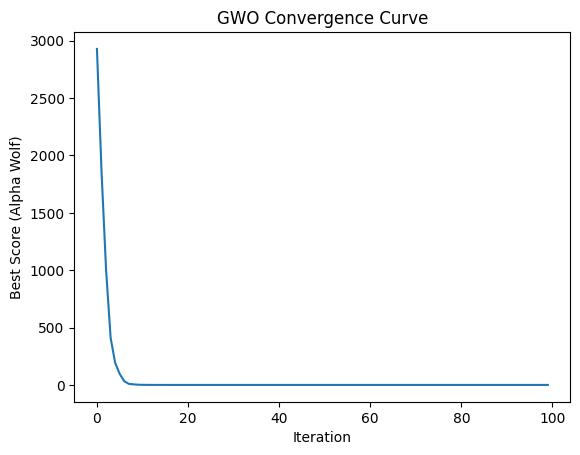

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_population(num_wolves, dimensions, search_space_min, search_space_max):
    """Initializes the grey wolf population within the search space."""
    population = search_space_min + (search_space_max - search_space_min) * np.random.rand(num_wolves, dimensions)
    return population

def calculate_distance(C, Xp, X):
    """Calculates the distance between a wolf and the prey."""
    return np.abs(C * Xp - X)

def update_position(Xp, D, A):
    """Updates the position of a wolf."""
    return Xp - A * D

def grey_wolf_optimizer(objective_function, num_wolves, dimensions, search_space_min, search_space_max, max_iterations):
    """Implements the Grey Wolf Optimizer algorithm."""

    population = initialize_population(num_wolves, dimensions, search_space_min, search_space_max)
    alpha_position = np.zeros(dimensions)
    beta_position = np.zeros(dimensions)
    delta_position = np.zeros(dimensions)
    alpha_score = float('inf')
    beta_score = float('inf')
    delta_score = float('inf')

    convergence_curve = []

    for iteration in range(max_iterations):
        scores = np.array([objective_function(wolf) for wolf in population])

        # Update alpha, beta, and delta
        sorted_indices = np.argsort(scores)
        alpha_score = scores[sorted_indices[0]]
        alpha_position = population[sorted_indices[0]].copy()

        if num_wolves > 1:
            beta_score = scores[sorted_indices[1]]
            beta_position = population[sorted_indices[1]].copy()
        if num_wolves > 2:
            delta_score = scores[sorted_indices[2]]
            delta_position = population[sorted_indices[2]].copy()


        # Update wolf positions
        a = 2 - iteration * (2 / max_iterations)  # Decreases linearly from 2 to 0

        for i in range(num_wolves):
            r1 = np.random.rand(dimensions)
            r2 = np.random.rand(dimensions)

            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = calculate_distance(C1, alpha_position, population[i])
            X1 = update_position(alpha_position, D_alpha, A1)

            r1 = np.random.rand(dimensions)
            r2 = np.random.rand(dimensions)
            A2 = 2 * a * r1 - a
            C2 = 2 * r2
            D_beta = calculate_distance(C2, beta_position, population[i])
            X2 = update_position(beta_position, D_beta, A2)

            r1 = np.random.rand(dimensions)
            r2 = np.random.rand(dimensions)
            A3 = 2 * a * r1 - a
            C3 = 2 * r2
            D_delta = calculate_distance(C3, delta_position, population[i])
            X3 = update_position(delta_position, D_delta, A3)

            # Update position based on alpha, beta, and delta
            population[i] = (X1 + X2 + X3) / 3

            # Handle boundaries
            population[i] = np.clip(population[i], search_space_min, search_space_max)

        convergence_curve.append(alpha_score)

    return alpha_position, alpha_score, convergence_curve

# Example objective function (Sphere function)
def sphere_function(x):
    return np.sum(x**2)

# GWO parameters
num_wolves = 30
dimensions = 5
search_space_min = -100
search_space_max = 100
max_iterations = 100

# Run GWO
best_position, best_score, convergence_curve = grey_wolf_optimizer(
    sphere_function, num_wolves, dimensions, search_space_min, search_space_max, max_iterations
)

print("Best position found:", best_position)
print("Best score found:", best_score)

# You can also plot the convergence curve to visualize the optimization process


plt.plot(convergence_curve)
plt.xlabel("Iteration")
plt.ylabel("Best Score (Alpha Wolf)")
plt.title("GWO Convergence Curve")
plt.show()